We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-06 13:53:58--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... failed: Name or service not known.
wget: unable to resolve host address ‘www.ecdc.europa.eu’


Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [4]:
df.count()

dateRep                    21547
day                        21547
month                      21547
year                       21547
cases                      21547
deaths                     21547
countriesAndTerritories    21547
geoId                      21547
countryterritoryCode       21307
popData2018                21231
continentExp               21547
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-06-01   0.0  661.0  680.0  0.0  0.0  15.0  355.0  2.0  637.0   4.0  ...   
2020-06-02   1.0  635.0  545.0  0.0  0.0   6.0  210.0  0.0  564.0  21.0  ...   
2020-06-03  79.0  596.0  759.0  0.0  0.0  21.0  517.0  0.0  904.0  11.0  ...   
2020-06-04   7.0  571.0  758.0  1.0  0.0  20.0  515.0  0.0  949.0  31.0  ...   
2020-06-05   1.0  659.0  787.0  0.0  0.0  13.0  697.0  0.0    0.0  36.0  ...   

           deaths                                                 
geoId          VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep                                                           
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-06-01    0.0  0.0  0.0  0.0  0.0  0.0   3.0  40.0  0.0  0.0  
2020-06-02    0.0  3.0  0.0  0.0  0.0  0.0   4.0  22.0  0.0  0.0  
2020-06-03    0.0  1.0  0.0  0.0  0.0  0.0   3.0  50.0  0.0  0.0  
2020-06-04    0.0  2.0  0.0  0.0  0.0  0.0   1.0  37.0  0.0  0.0  
2020-06-05    0.0  0.0  0.0  0.0  0.0  0.0  15.0  56.0  0.0  0.0  

[158 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-06-01   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-02   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-03   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-04   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-05   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-06-01 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-02 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-03 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-04 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-05 NaN  NaN NaN NaN NaN NaN NaN  

[523 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since the earliest date in the dataframe.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    523.000000
mean     261.000000
std      151.121364
min        0.000000
25%      130.500000
50%      261.000000
75%      391.500000
max      522.000000
Name: daynum, dtype: float64

Suppress warnings for multiple plots when analyzing many countries with `showplots = True`.

In [8]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running for multiple countries with a selection or simply all countries found in the input. Full documentation of the approach is found in the `Gumbelpivot` notebook.

US: rsquared 0.993 at  90% of 2012308 start 2020-03-12 peak 2020-04-24 floor 2020-08-21 beta 20.96 mu 115
UK: rsquared 0.999 at  90% of  308080 start 2020-03-14 peak 2020-04-22 floor 2020-08-10 beta 20.05 mu 113
BR: rsquared 0.995 at  17% of 3169905 start 2020-03-27 peak 2020-07-05 floor 2021-04-13 beta 49.10 mu 187
CH: rsquared 0.949 at 114% of   26908 start 2020-03-09 peak 2020-03-27 floor 2020-05-16 beta  8.46 mu  87
DE: rsquared 0.996 at  99% of  184247 start 2020-03-08 peak 2020-04-05 floor 2020-06-19 beta 14.96 mu  96
IT: rsquared 1.000 at  98% of  238136 start 2020-02-28 peak 2020-04-02 floor 2020-07-04 beta 17.04 mu  93
ES: rsquared 0.982 at 107% of  223565 start 2020-03-08 peak 2020-03-30 floor 2020-06-03 beta 10.51 mu  90
PT: rsquared 0.986 at  97% of   33881 start 2020-03-09 peak 2020-04-14 floor 2020-07-17 beta 18.14 mu 105
FR: rsquared 0.994 at 103% of  147193 start 2020-03-10 peak 2020-04-05 floor 2020-06-13 beta 13.57 mu  96
SE: rsquared 0.997 at  78% of   49219 start 20

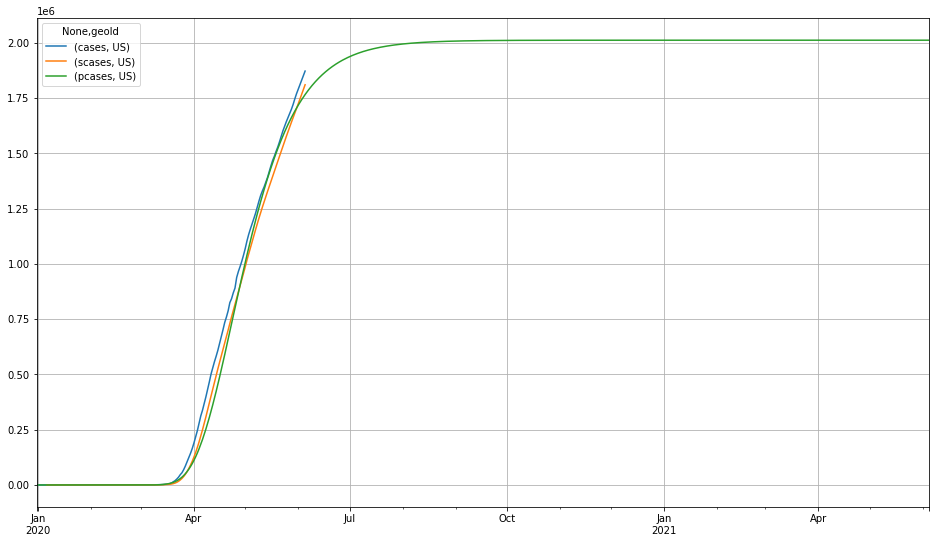

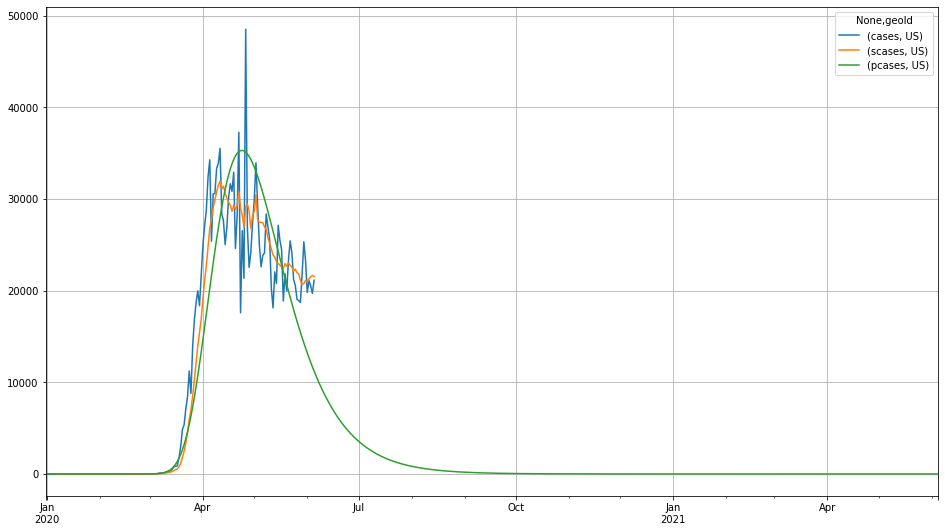

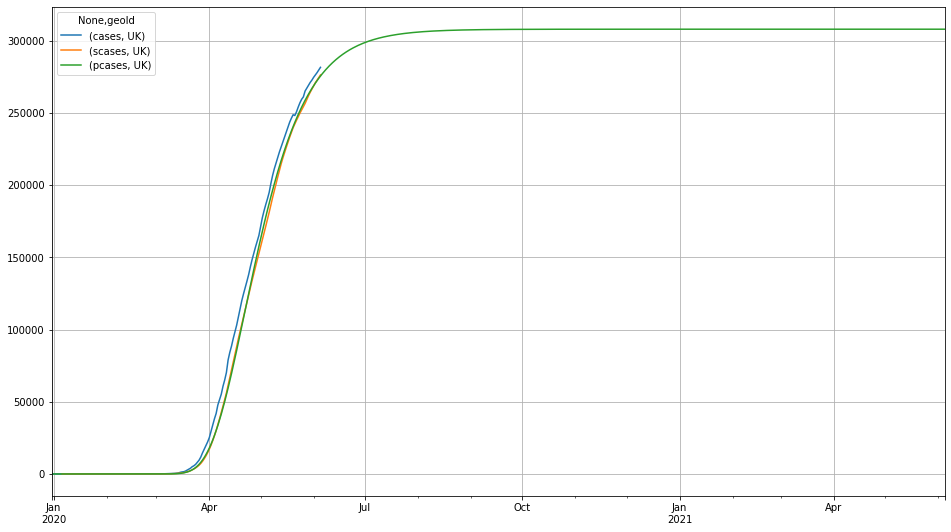

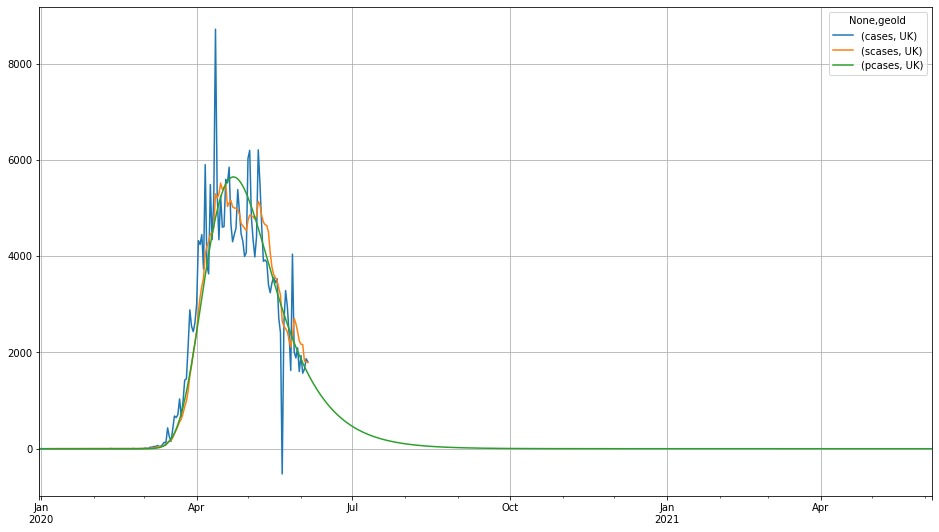

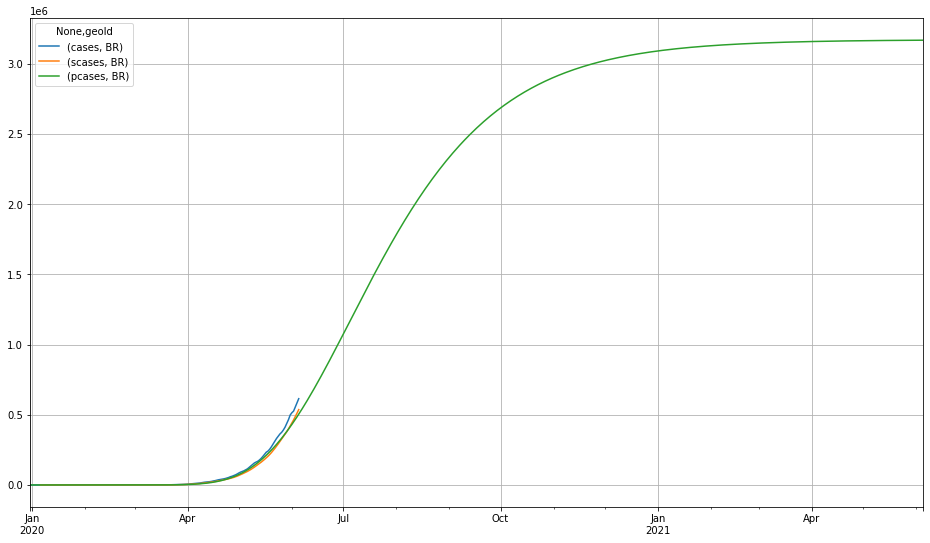

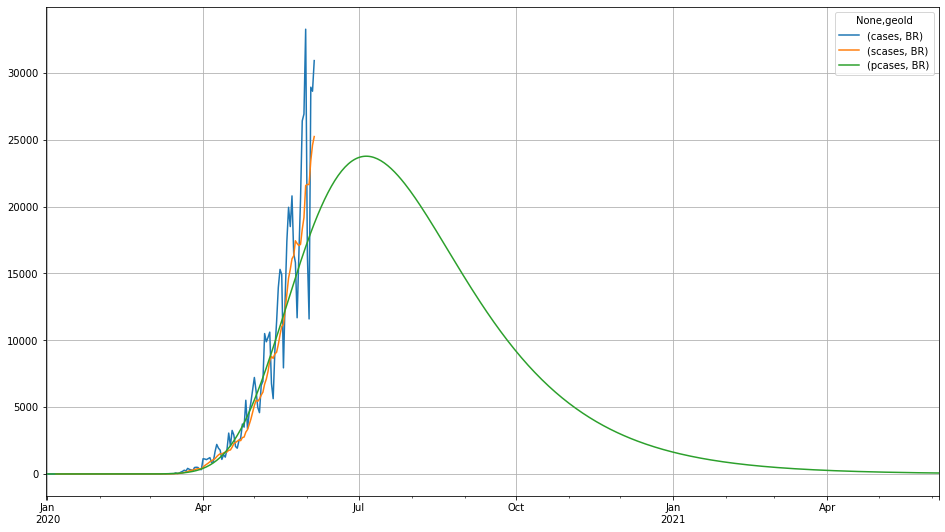

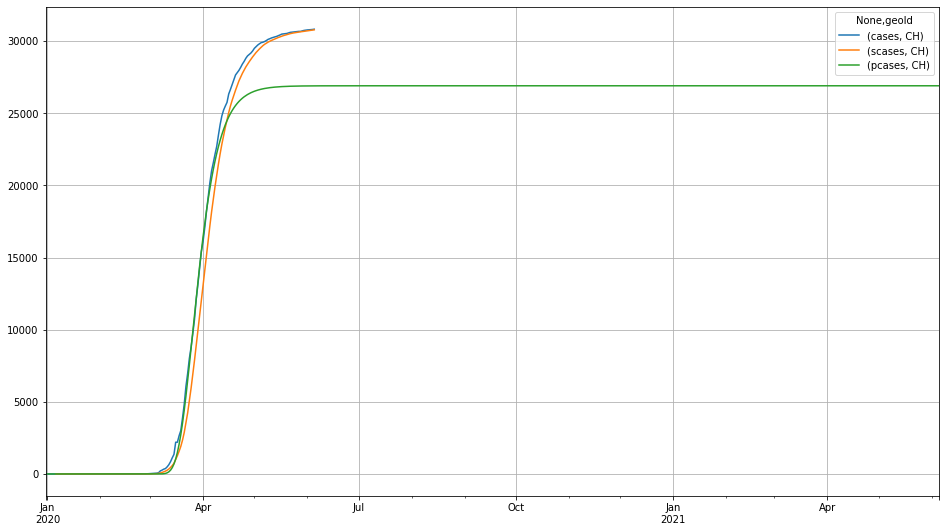

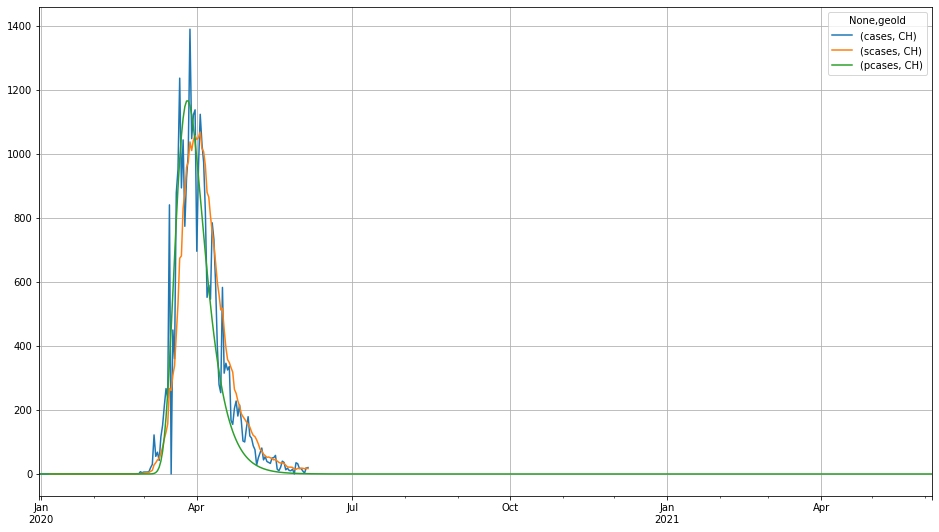

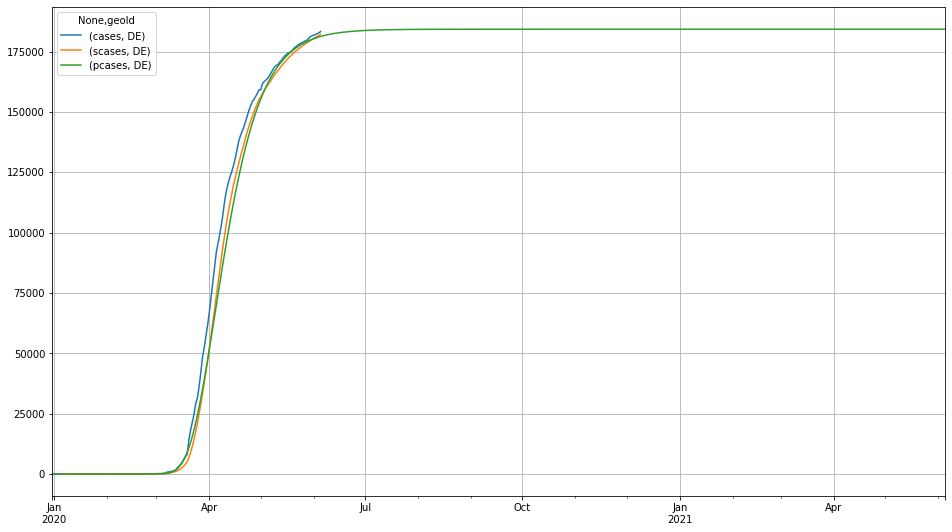

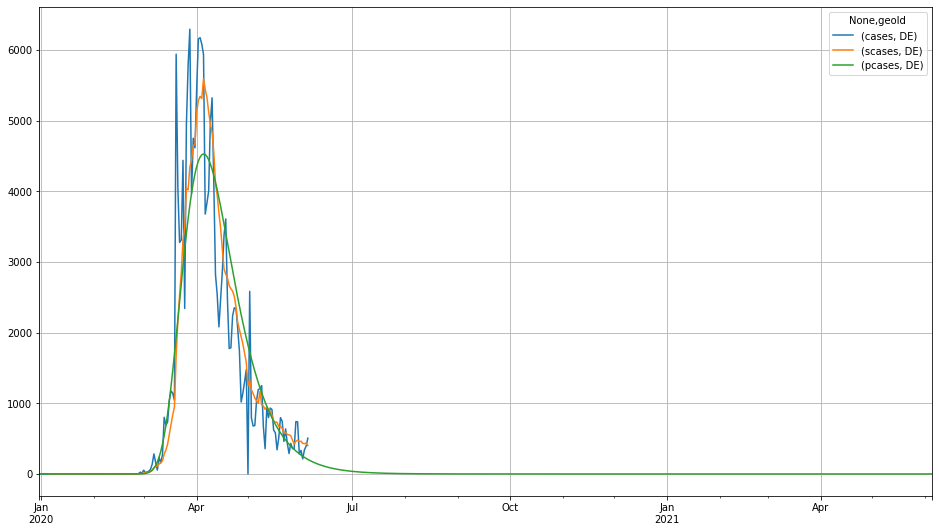

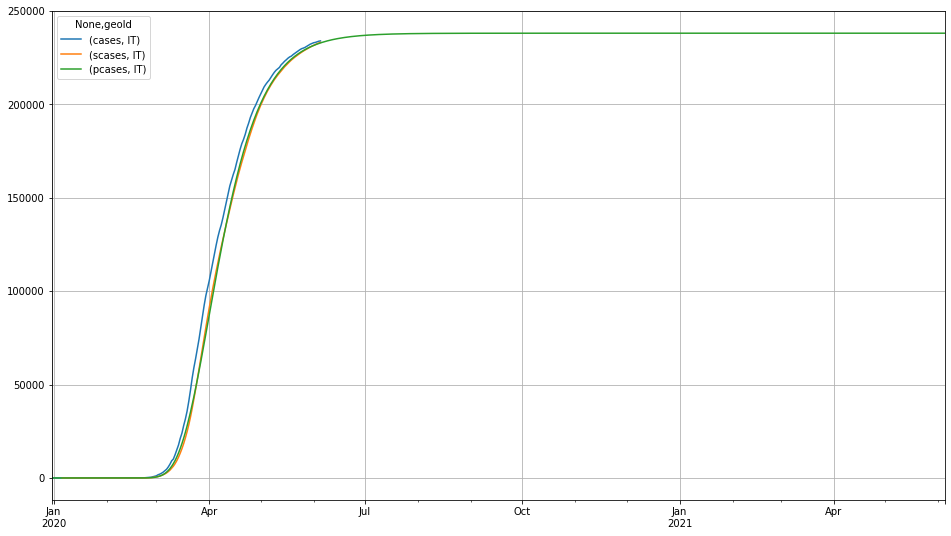

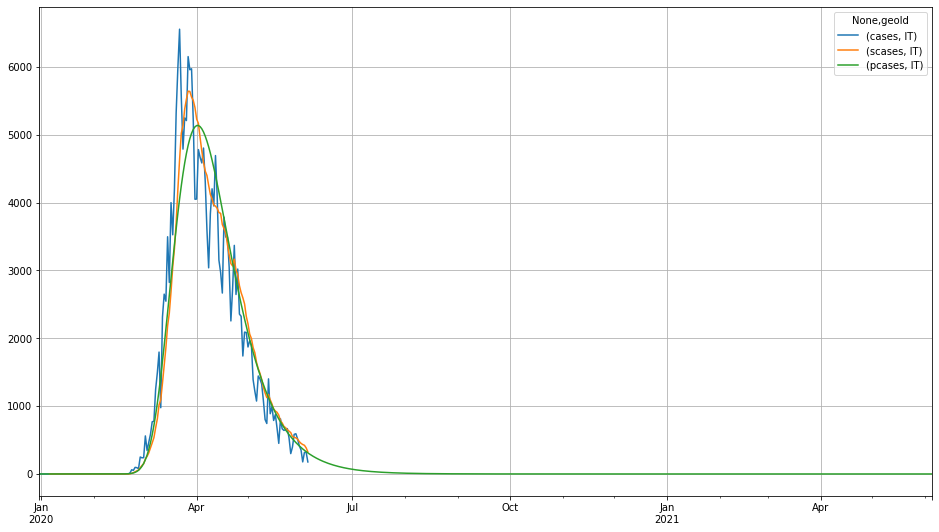

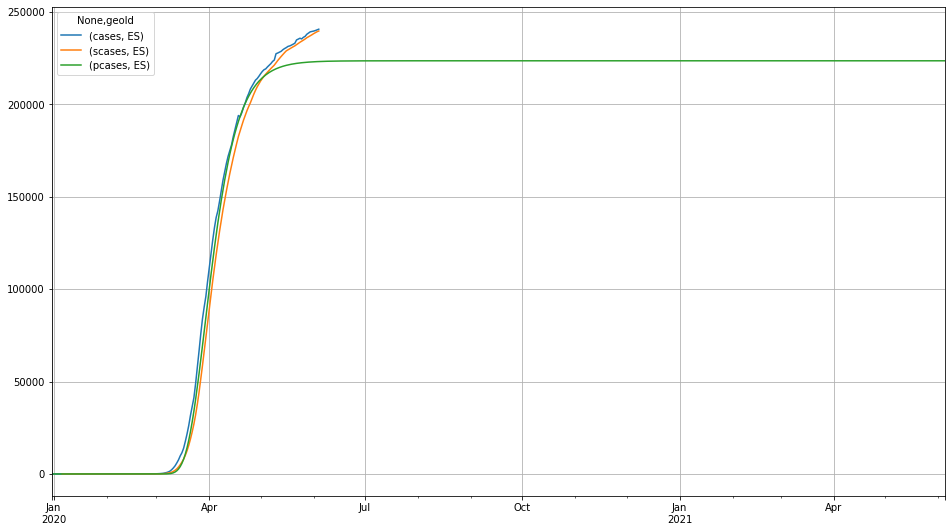

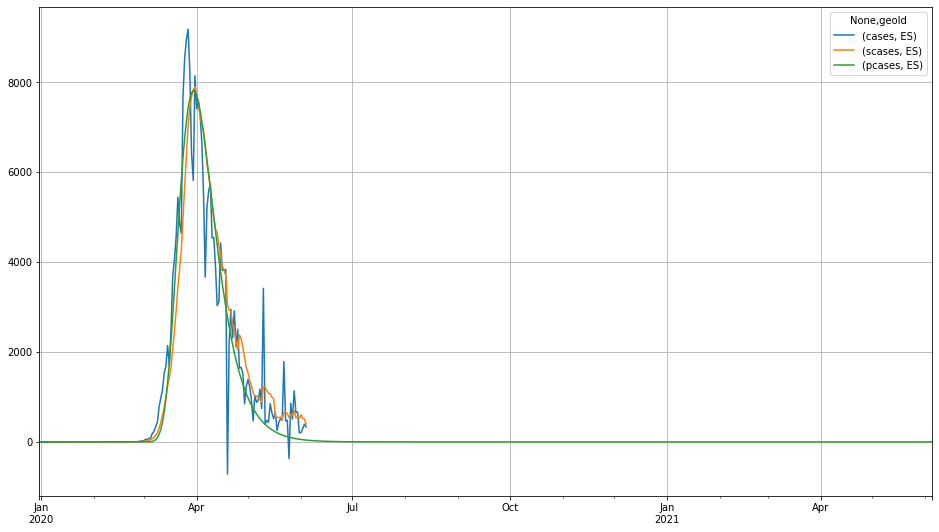

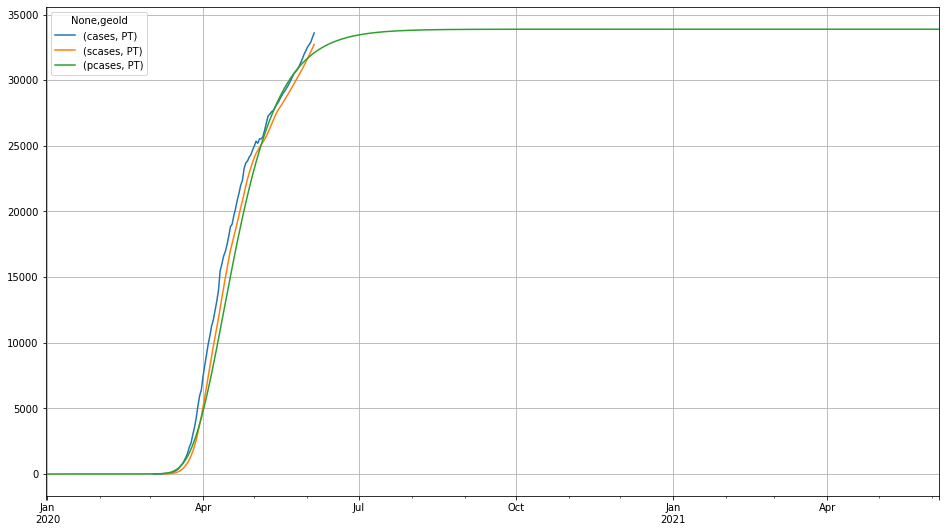

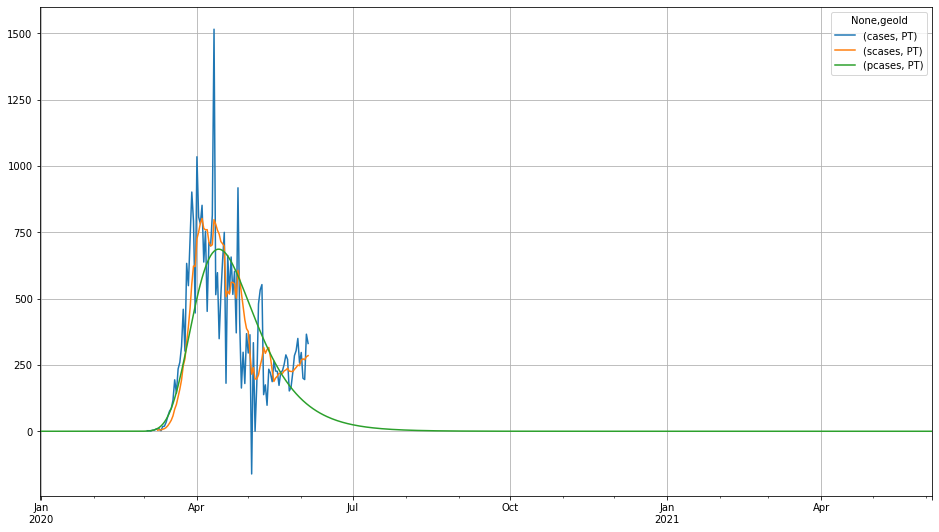

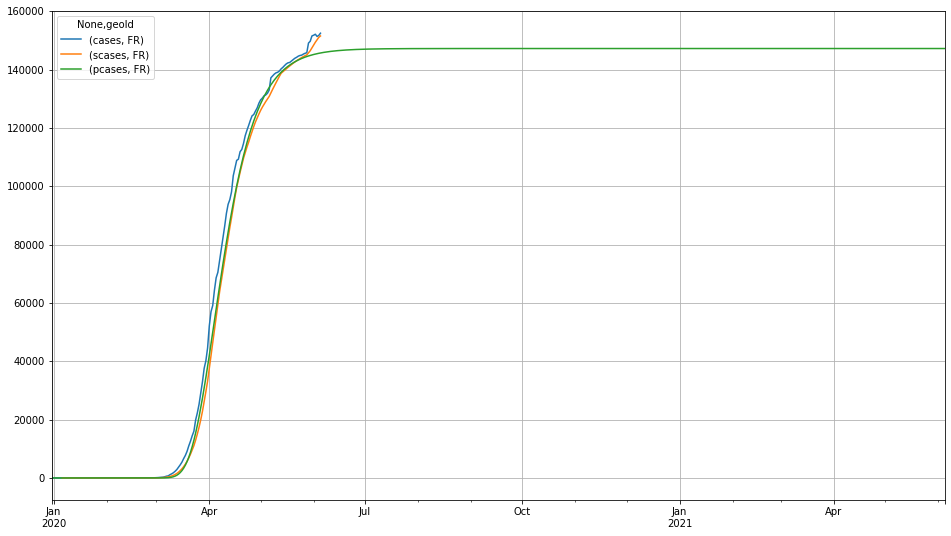

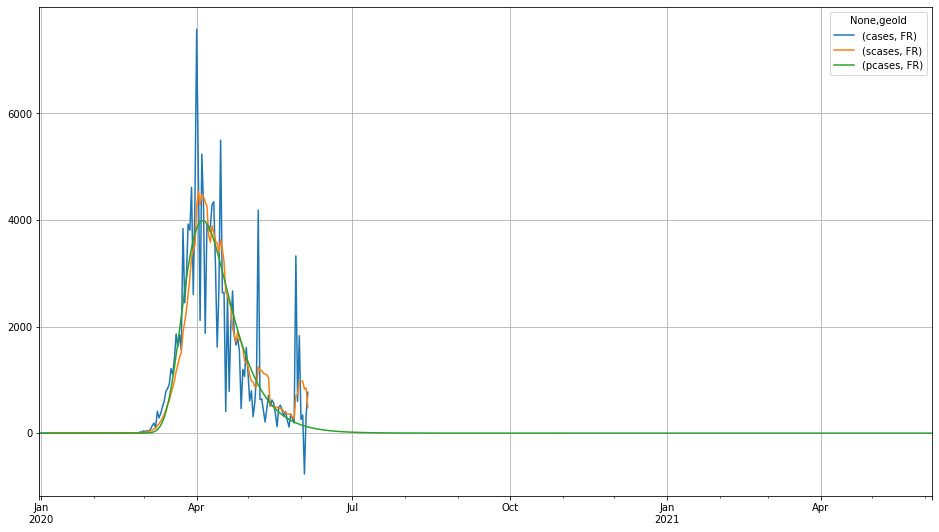

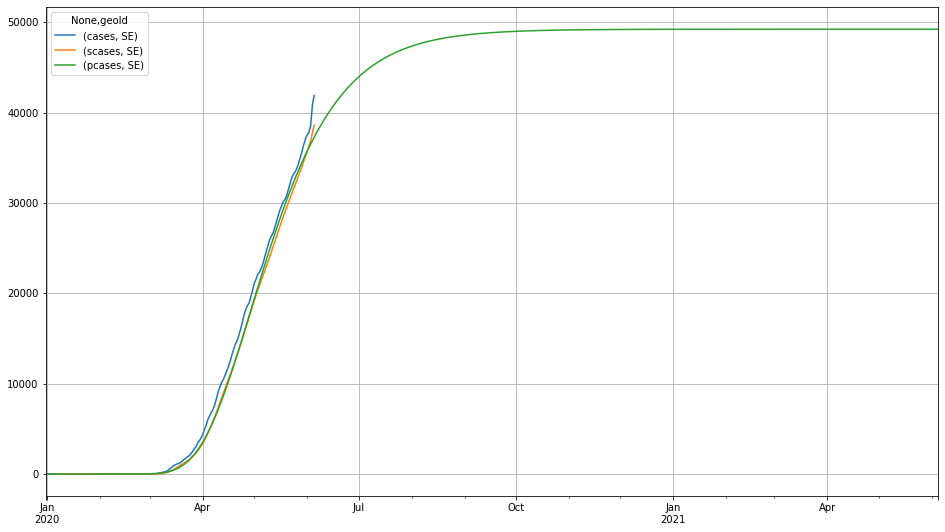

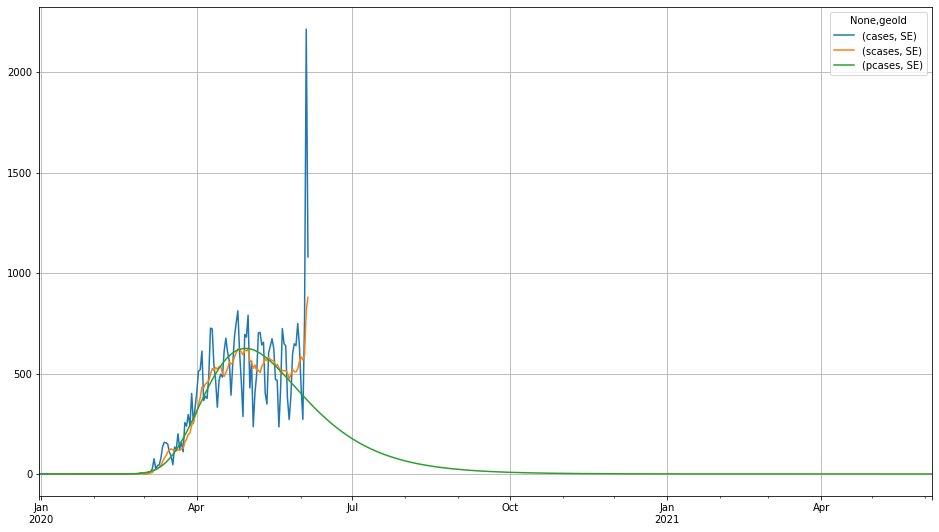

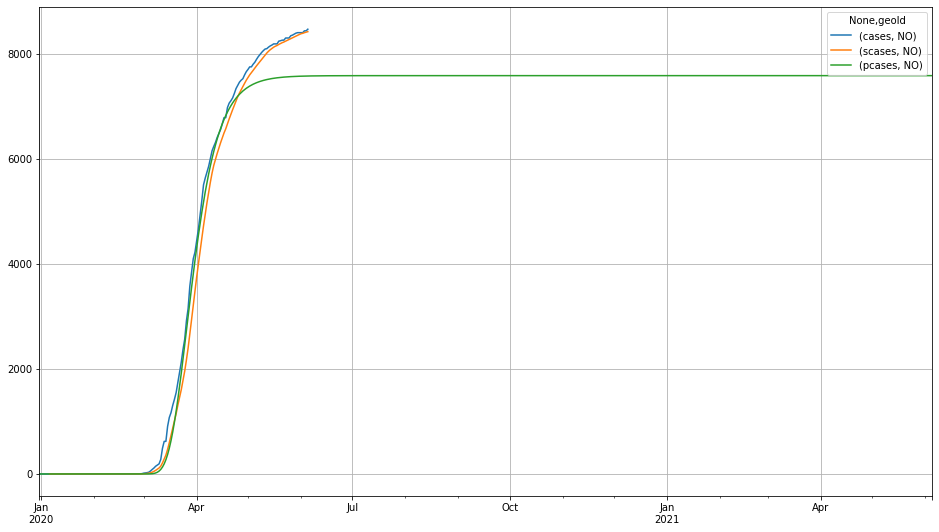

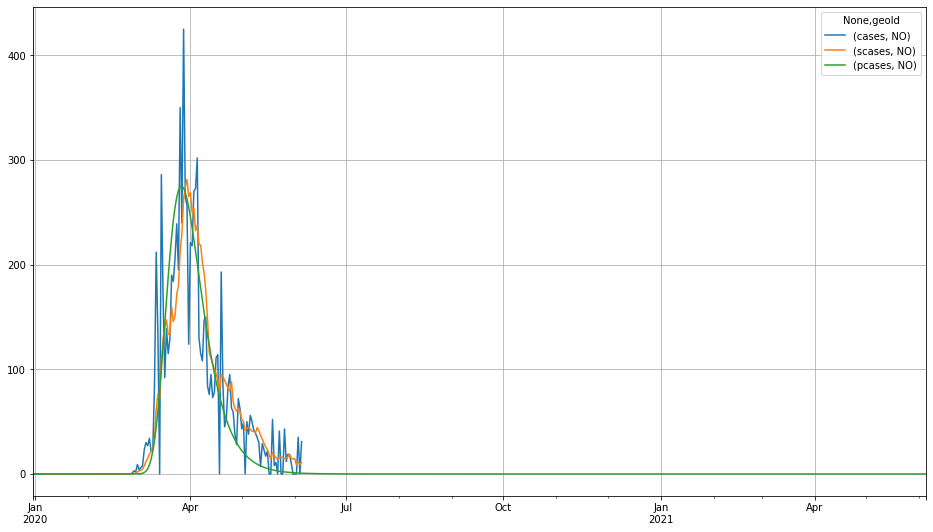

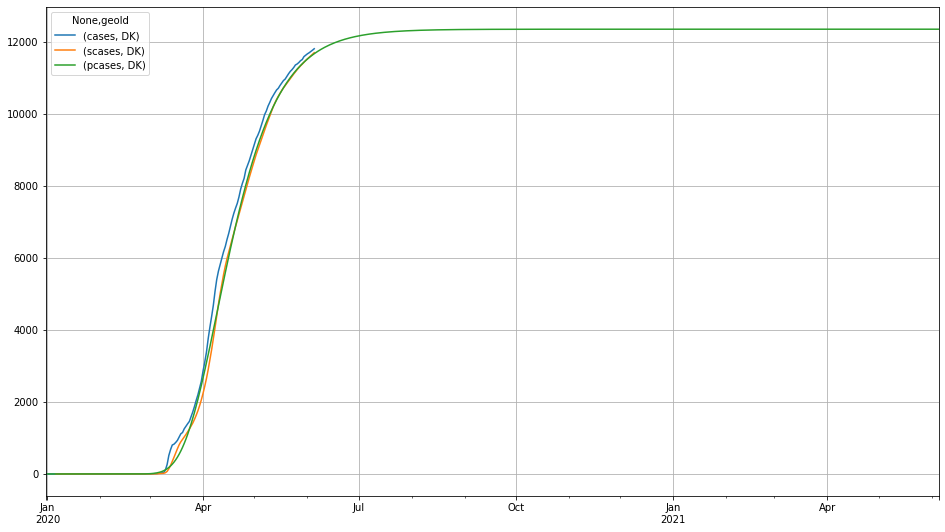

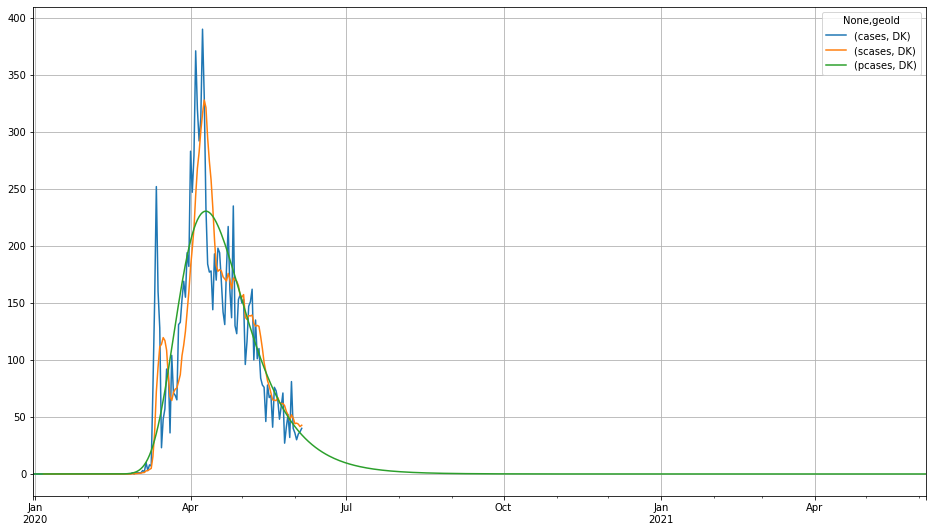

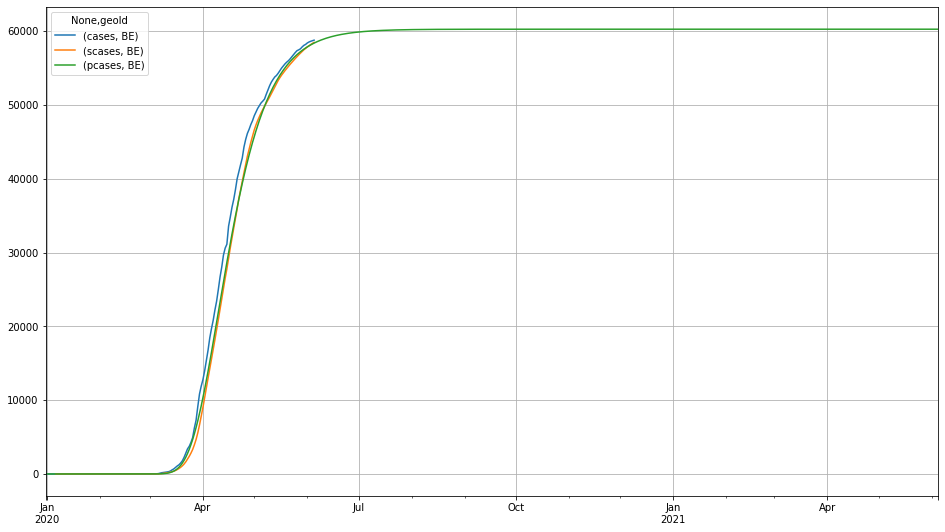

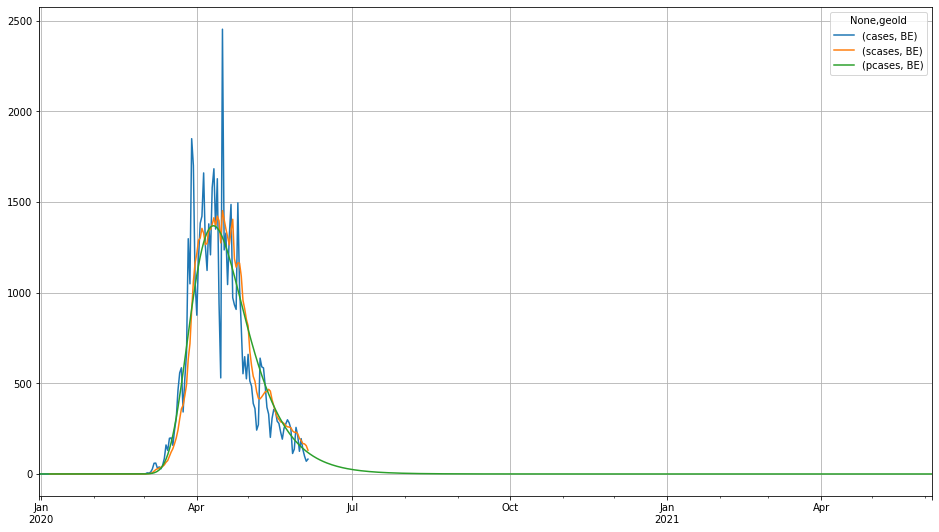

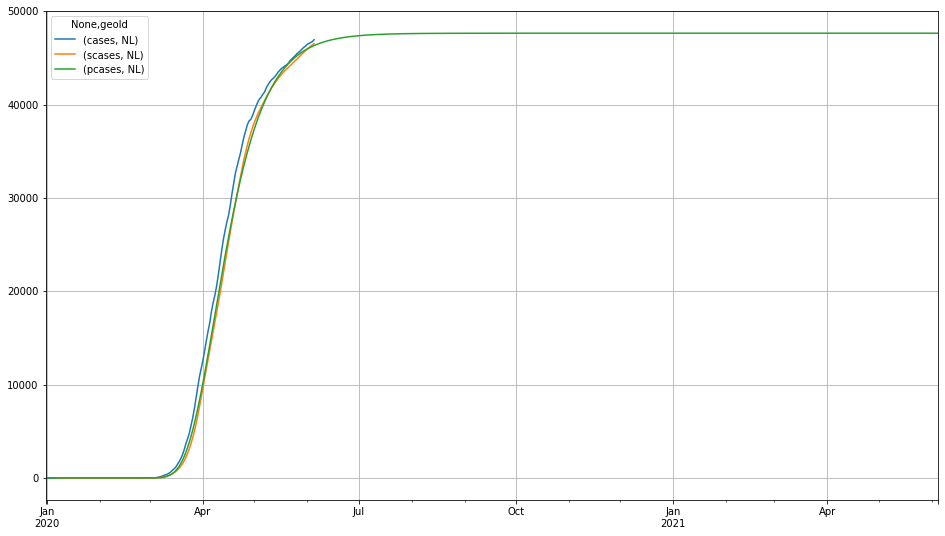

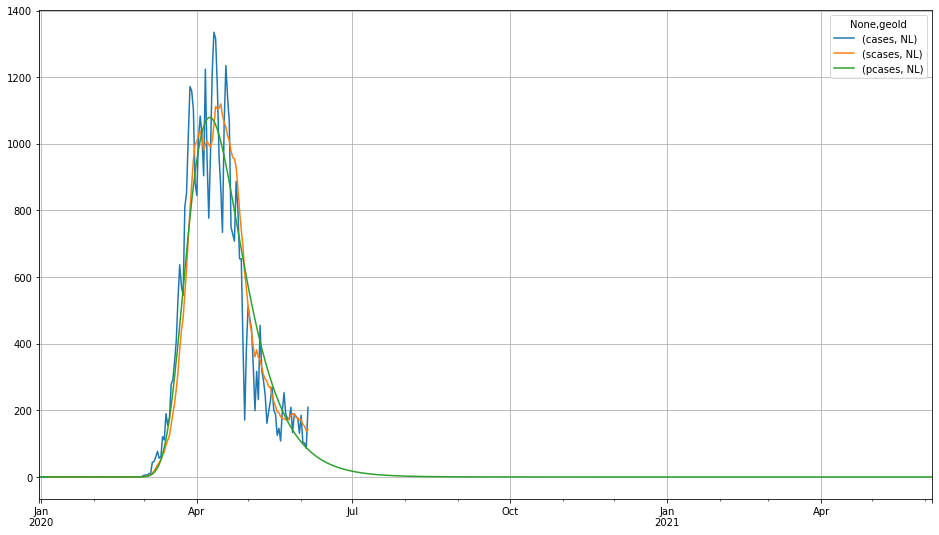

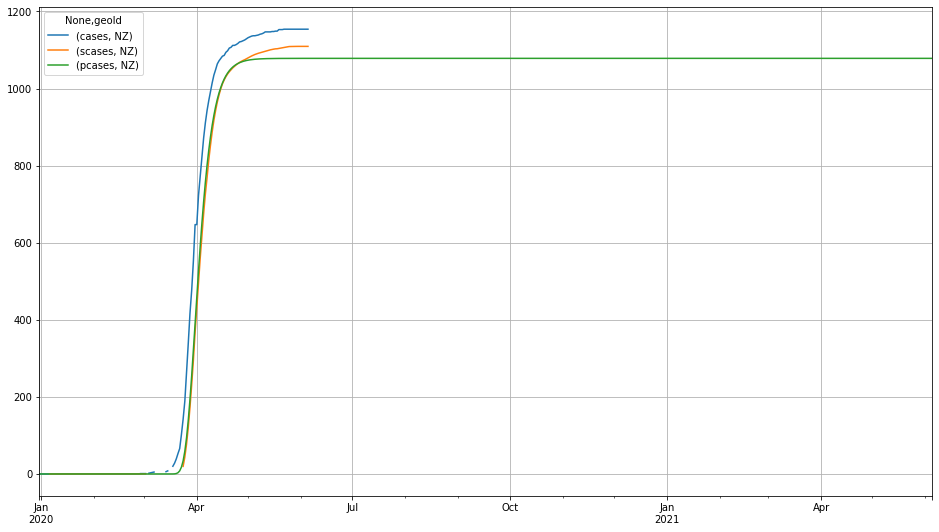

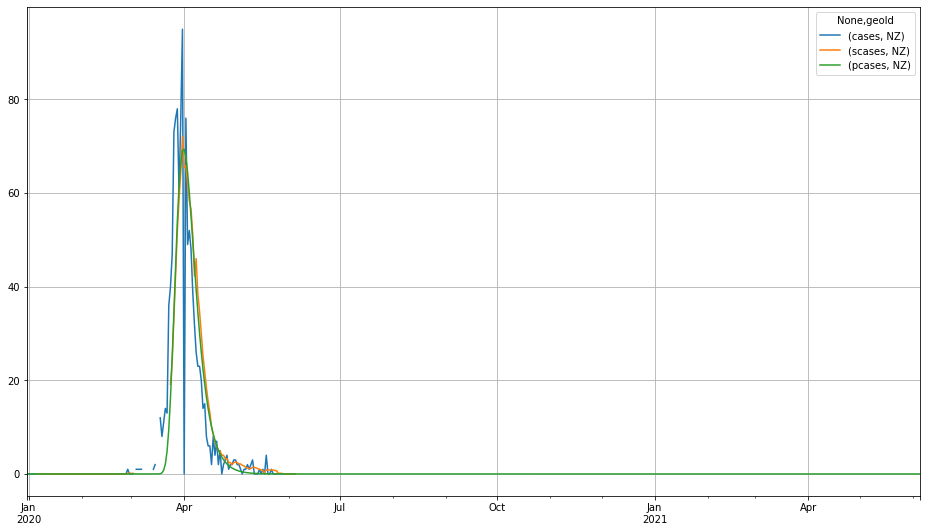

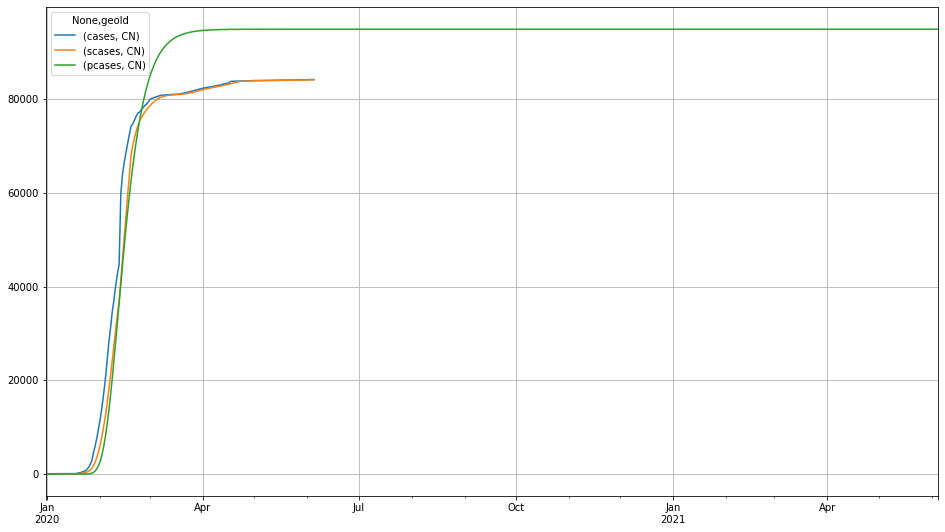

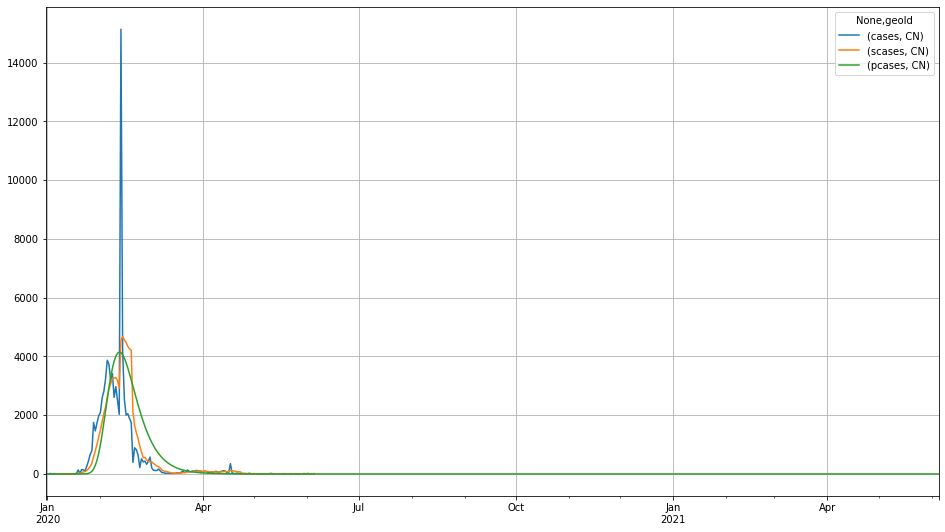

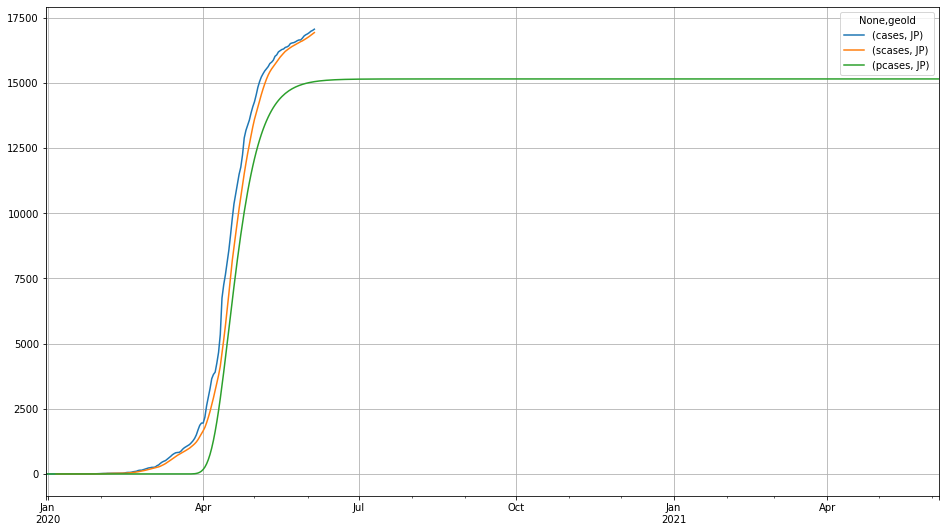

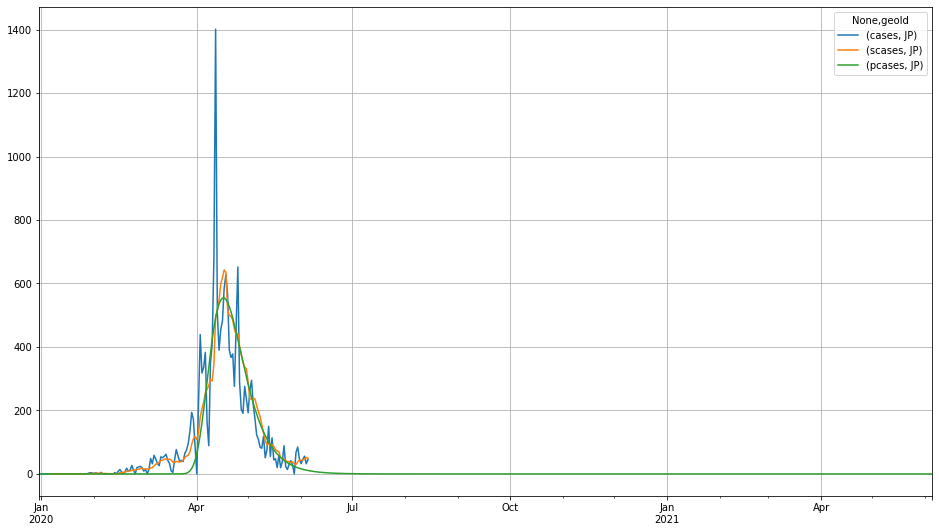

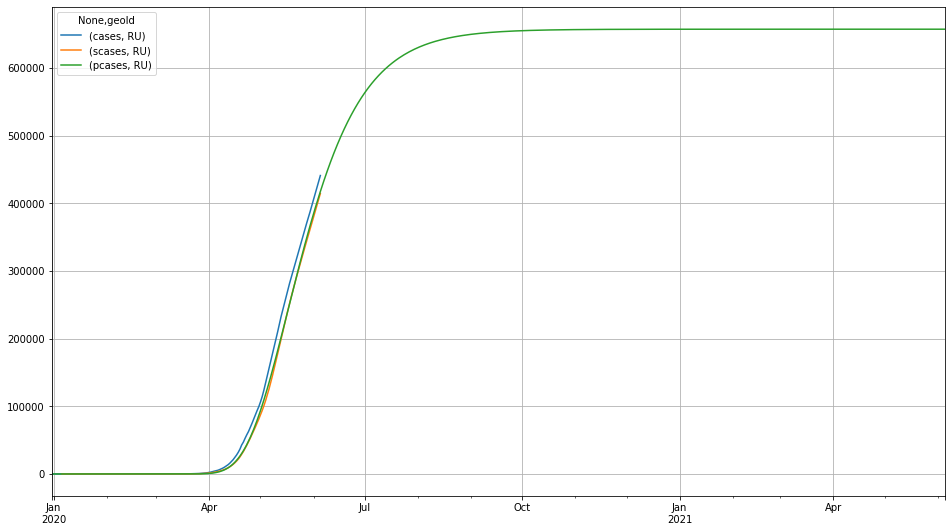

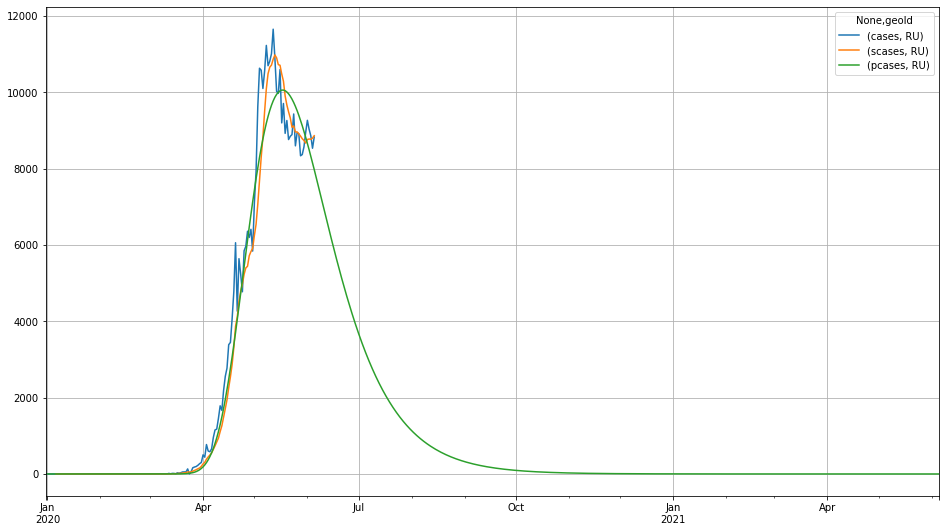

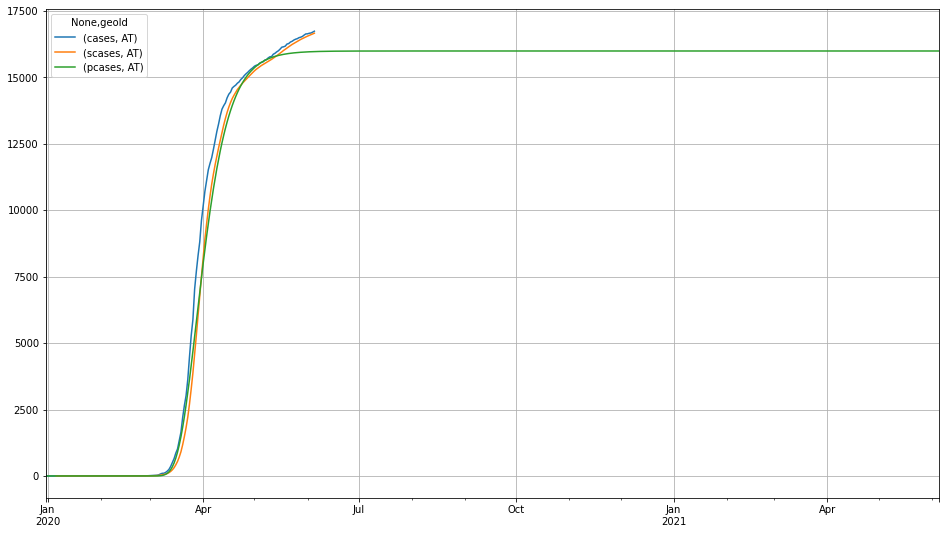

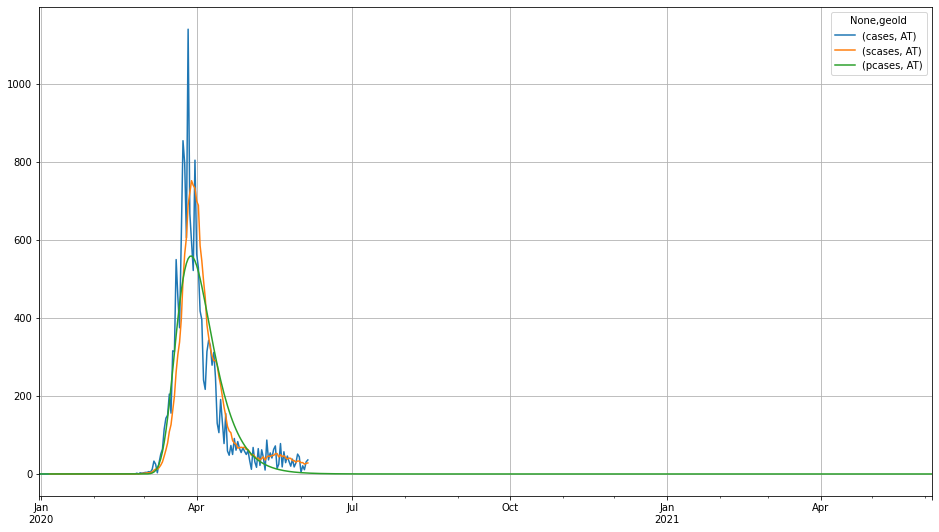

In [9]:
# Select countries to fit.
#countries = np.sort(df['geoId'].unique())
countries = ['US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE',
             'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT']

# Choose whether to output plots per country.
showplots = True

# Create an output dataframe.
df_out = pd.DataFrame({
    'cname':np.nan,
    'iso3':np.nan,
    'ccont':np.nan,
    'popdata':np.nan,
    'rsquared':np.nan,
    'progress':np.nan,
    'final':np.nan,
    'start':np.nan,
    'peak':np.nan,
    'floor':np.nan,
    'beta':np.nan,
    'mu':np.nan,
    'maxcur':np.nan},
    index=countries)

# Choose measure to fit and variables to store predicted and smoothed measures.
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

def gumbelval(x, beta, mu):
    """Return the Gumbel CDF for x according to beta and mu"""
    return np.exp(- np.exp(- (x - mu) / beta))

def gumbelinv(x):
    """Inverse Gumbel function"""
    return(- np.log(- np.log(x)))

from scipy.stats import linregress

def fitres(progress):
    """Try to fit a line according to progress, returning correlation of fit"""
    global df_pred, slope, intercept
    
    # Scale the cumulative measure and only keep cases below 1 for fitting
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    df_fit = df_pred[df_pred['scaled'] < 1].copy()
    
    # Only try fitting if we have at least 5 measures left.
    if len(df_fit) > 4:
        df_fit['linear'] = gumbelinv(df_fit['scaled'])
        slope, intercept, correlation, pvalue, stderr = linregress(df_fit[['daynum', 'linear']])
        #print('Progress {:13.9f} gives {:13.9f} for {:1.0f} measures'.format(
        #    progress, fit[1][0], len(df_fit)))
        return(1 - correlation)
    else:
        return np.nan

from scipy.optimize import minimize_scalar
    
# Run the fitting approach for all countries.
for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
    df_pred = pd.DataFrame(
        {'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    # Extract country parameters from the original dataset.
    cname   = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    iso3    = df[df['geoId'] == country]['countryterritoryCode'].iloc[0]
    ccont   = df[df['geoId'] == country]['continentExp'].iloc[0]
    popdata = df[df['geoId'] == country]['popData2018'].iloc[0]

    # Current number of cases for scaling.
    numcases = df_pred[measure].sum()
    
    # We will only use measures above one in a million.
    mincases = popdata / 1e6
    df_pred = df_pred[df_pred[measure] > mincases]

    # Only start fitting if we have at least 5 measures.
    if len(df_pred) > 4:
        df_pred['cumul'] = df_pred[measure].cumsum()
        
        # Find the optimal fit.
        optim    = minimize_scalar(fitres, method='bounded', bounds=(0, 1.5))
        progress = optim.x
        rsquared = (1 - optim.fun) ** 2
        bestfit  = fitres(progress)
        
        # Calculate Gumbel beta and mu from our linear fit parameters.
        beta = 1 / slope
        mu = - intercept / slope
        
        # Create predicted measures by calculating the Gumbel CDF and reduce to PDF.
        df_geo[(pmeasure, country)] = np.gradient(gumbelval(df_geo['daynum'], beta, mu) * numcases / progress)
 
        # Determine peak, floor, start and final analytically.
        peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index > peak)].index.min()
        start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index < peak)].index.min()
        final = df_geo[pmeasure][country].sum()
        
        # Maximum current infected seems a good measure for outbreak intensity, to be scaled by population.
        maxcur = df_geo[pmeasure][country].rolling(14).sum().max()
        
        # Create an output record and log results.
        df_out.loc[country] = [cname, iso3, ccont, popdata, rsquared, progress, final, start.date(), peak.date(), floor.date(), beta, mu, maxcur]
        print('{}: rsquared {:5.3f} at {:3.0f}% of {:7.0f} start {} peak {} floor {} beta {:5.2f} mu {:3.0f}'.format(
            country, rsquared, progress * 100, final, start.date(), peak.date(), floor.date(), beta, mu))
        
        # Show cumulative and derived results.
        if showplots:
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
                figsize=(16, 9), grid=True)
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
                figsize=(16, 9), grid=True)
    else:
        df_out.loc[country] = [cname, iso3, ccont, popdata, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

Check the output frame assigning the index name.

In [10]:
df_out.index.name = 'iso2'
df_out

,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur
iso2,,,,,,,,,,,,,
US,United_States_of_America,USA,America,3.271674e+08,0.992876,0.899815,2.012308e+06,2020-03-12,2020-04-24,2020-08-21,20.961487,114.800948,485243.370658
UK,United_Kingdom,GBR,Europe,6.648899e+07,0.999447,0.897097,3.080802e+05,2020-03-14,2020-04-22,2020-08-10,20.054542,113.461950,77512.143748
BR,Brazil,BRA,America,2.094693e+08,0.994973,0.169232,3.169905e+06,2020-03-27,2020-07-05,2021-04-13,49.104523,187.424839,331695.512964
CH,Switzerland,CHE,Europe,8.516543e+06,0.948526,1.144136,2.690801e+04,2020-03-09,2020-03-27,2020-05-16,8.456864,86.508303,14705.211753
DE,Germany,DEU,Europe,8.292792e+07,0.995957,0.988525,1.842466e+05,2020-03-08,2020-04-05,2020-06-19,14.955193,96.047669,61191.126876
IT,Italy,ITA,Europe,6.043128e+07,0.999649,0.979327,2.381360e+05,2020-02-28,2020-04-02,2020-07-04,17.036888,92.531840,69969.702261
ES,Spain,ESP,Europe,4.672375e+07,0.982149,1.072094,2.235647e+05,2020-03-08,2020-03-30,2020-06-03,10.511312,90.165062,101878.792073
PT,Portugal,PRT,Europe,1.028176e+07,0.986319,0.965758,3.388056e+04,2020-03-09,2020-04-14,2020-07-17,18.140292,104.704309,9381.881670
FR,France,FRA,Europe,6.698724e+07,0.994051,1.029218,1.471927e+05,2020-03-10,2020-04-05,2020-06-13,13.568894,95.569459,53459.659261


Write out the values per country, discarding countries with progress below 1%.

In [11]:
df_out[df_out['progress'] > 0.01].to_csv("zzprogress.csv")

Keep exploring! Stay home, wash your hands, keep your distance.